<a href="https://colab.research.google.com/github/tlysenko/ML-notebooks/blob/master/Antibioitic_resistance_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset

100k samples of bacterial genomic sequence and resistance to antibiotic

https://www.kaggle.com/drscarlat/dzd-data

## Importing libraries

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## Data

In [6]:
data_path = '/content/drive/MyDrive/ColabNotebooks/Antibiotics-resistance/data/dataset.npy'
raw_data = np.load(data_path, allow_pickle=True)

In [7]:
print('data type:', type(raw_data))
print('data dim:', raw_data.ndim)

data type: <class 'numpy.ndarray'>
data dim: 0


In [8]:
raw_data

array({'resistant': array([False, False, False, ...,  True,  True, False]), 'genes': array(['ATGCACTACCGTATGATCCCCCTTCACTGGATGATGGAAATTGACTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACACGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA',
       'ATGCACTACCGTATGATTCACTGGATGATGGAAATTGACTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACCCGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA',
       'ATGCACTACCGTATGATTCACTGGATCGTGATGGAAATTGACTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACACGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA',
       ...,
       'ATGCACTACCGTATGATTCACTGGATGATGGAAACTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACACGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA',
       'ATGCACTACCGTATGATTCACTGGATGATGGAAATTGACTTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACACGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA',
       'ATGCACTACCGTATGATTCACTGGATGATGGAAATTGACTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTAC

In [9]:
data_dict = raw_data[()]

In [10]:
data_dict

{'genes': array(['ATGCACTACCGTATGATCCCCCTTCACTGGATGATGGAAATTGACTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACACGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA',
        'ATGCACTACCGTATGATTCACTGGATGATGGAAATTGACTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACCCGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA',
        'ATGCACTACCGTATGATTCACTGGATCGTGATGGAAATTGACTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACACGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA',
        ...,
        'ATGCACTACCGTATGATTCACTGGATGATGGAAACTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACACGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA',
        'ATGCACTACCGTATGATTCACTGGATGATGGAAATTGACTTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACACGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA',
        'ATGCACTACCGTATGATTCACTGGATGATGGAAATTGACTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACACGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA'],

In [11]:
df = pd.DataFrame.from_dict(data_dict)
df.head()

,resistant,genes
0,False,ATGCACTACCGTATGATCCCCCTTCACTGGATGATGGAAATTGACT...
1,False,ATGCACTACCGTATGATTCACTGGATGATGGAAATTGACTGCAATG...
2,False,ATGCACTACCGTATGATTCACTGGATCGTGATGGAAATTGACTGCA...
3,False,ATGCACTACCGTATGATTCACTGGGTGATGGAAATTGACTGCAATG...
4,False,ATGCACGACCGTATCATTCACTGGATGATGGAAATTGACTGCAATG...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   resistant  100000 non-null  bool  
 1   genes      100000 non-null  object
dtypes: bool(1), object(1)
memory usage: 879.0+ KB


In [13]:
# No missing values
np.sum(df.isna())

resistant    0
genes        0
dtype: int64

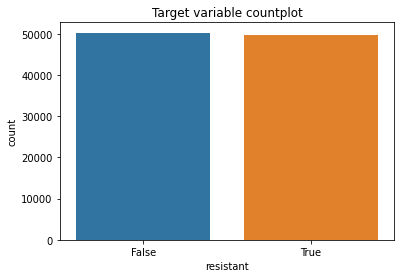

In [14]:
# Target variable is well balanced
ax = sns.countplot(x = df.resistant);
ax.set_title('Target variable countplot');


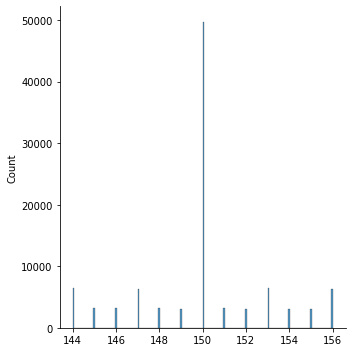

In [15]:
len_array = [len(seq) for seq in df.genes]
sns.displot(len_array);

## Gene seqs to kmers seqs

In [21]:
def GetKmers(k, gene):
  ost = len(gene) % k 
  l = len(gene) - ost - k + 1
  return [gene[i:i+k] for i in range(l)]

In [26]:
# generating 5-mers
df['k5'] = df.apply(lambda x: GetKmers(k=5, gene=x.genes), axis = 1)

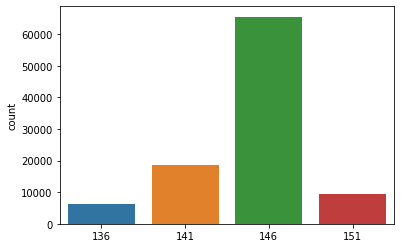

In [23]:
len_ = [len(seq) for seq in df.k5]
sns.countplot(x = len_);

## Train-Test-Split

In [43]:
df.head()

,resistant,genes,k5
0,False,ATGCACTACCGTATGATCCCCCTTCACTGGATGATGGAAATTGACT...,"[ATGCA, TGCAC, GCACT, CACTA, ACTAC, CTACC, TAC..."
1,False,ATGCACTACCGTATGATTCACTGGATGATGGAAATTGACTGCAATG...,"[ATGCA, TGCAC, GCACT, CACTA, ACTAC, CTACC, TAC..."
2,False,ATGCACTACCGTATGATTCACTGGATCGTGATGGAAATTGACTGCA...,"[ATGCA, TGCAC, GCACT, CACTA, ACTAC, CTACC, TAC..."
3,False,ATGCACTACCGTATGATTCACTGGGTGATGGAAATTGACTGCAATG...,"[ATGCA, TGCAC, GCACT, CACTA, ACTAC, CTACC, TAC..."
4,False,ATGCACGACCGTATCATTCACTGGATGATGGAAATTGACTGCAATG...,"[ATGCA, TGCAC, GCACG, CACGA, ACGAC, CGACC, GAC..."


In [44]:
y = df.resistant
X = df.k5

In [45]:
 X_train, X_test, y_train, y_test = train_test_split(
                                   X, y, test_size=0.20, shuffle=True, random_state=42)

In [46]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(80000,) (80000,)
(20000,) (20000,)


## Tensroflow data preprocessing

In [82]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [38]:
# Identify vocabulary size 

vocab = set()
for row in df.k5:
  row_s = set(row)
  vocab.update(row_s)
print('vocab size: ',len(vocab))

vocab size:  1024


In [39]:
# identify total amount of "words" in the data

words_count = 0
for row in df.k5:
  words_count += len(row)
print('words count:', words_count)

words count: 14489390


In [91]:
MAX_SEQUENCE_LENGTH = 136
VOCAB_SIZE = len(vocab)

int_vectorize_layer = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=MAX_SEQUENCE_LENGTH)

def int_vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return int_vectorize_layer(text), label

In [88]:
train_all = np.array(pd.DataFrame(data = [X_train, y_train.astype(int)]).transpose())
text_batch, label_batch = next(iter(train_all))
#first_question, first_label = text_batch[0], label_batch[0]

In [92]:
print("'int' vectorized question:",
      int_vectorize_text(text_batch, first_label)[0])

'int' vectorized question: tf.Tensor(
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]], shape=(151, 136), dtype=int64)
